# __Linear Regression__

Topics:
- Simple Linear Regression
- Multiple Linear Regression

## __I. Simple Linear Regression__

Equation: $$Y\approx \beta_0 + \beta_1X$$
Example TV and Sales: $$sales \approx \beta_0 + \beta_1 \times TV$$
Actual equation for prediction: $$\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$$
Where, $\hat{y}$ indicates a prediction, then, $\beta_0$ and $\beta_1$ are known as the model __coefficients__ or __parameters__.

### __Estimating the Coefficients__

Before, we can use the equation, let us first estimate the data to estimate the coefficients: $$(x_1,y_1), (x_2,y_2),...,(x_n,y_n)$$
There are number of ways to of measuring the closeness (how close our line is to every data point). The most common approach for this is the __least squares__ criterion.

The residual formula: $$e_i=y_i-\hat{y_i}$$
The __residual sum of squares (RSS)__: $$RSS = e^2_1+e^2_2+...+e^2_n$$
or $$RSS=(y_1-\hat{\beta}_0-\hat{\beta}_1x_1)^2+(y_2-\hat{\beta}_0-\hat{\beta}_1x_2)^2+...+(y_n-\hat{\beta}_0-\hat{\beta}_1x_n)^2$$
Using calculus, one can show that the minimizers are: 
$$
\begin{aligned}
\hat{\beta}_1 &= \frac{\sum^n_{i=1}(x_i-\overline{x})(y_i-\overline{y})}{\sum^n_{i=1}(x_i-\overline{x})^2} \\
\hat{\beta}_0 &= \hat{y} - \hat{\beta}_1 \overline{x}
\end{aligned}
$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
subset = df[['TV', 'sales']]
subset.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='sales'>

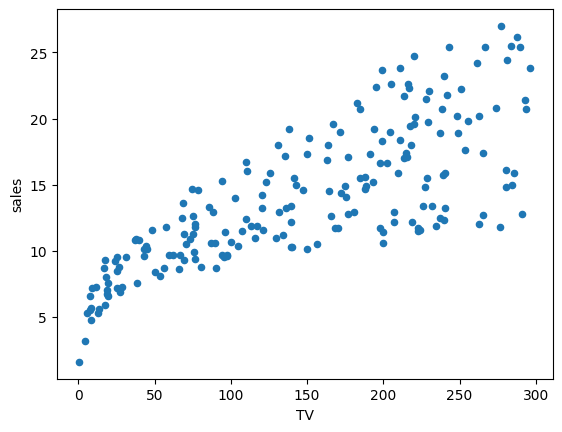

In [3]:
subset.plot.scatter('TV', 'sales')

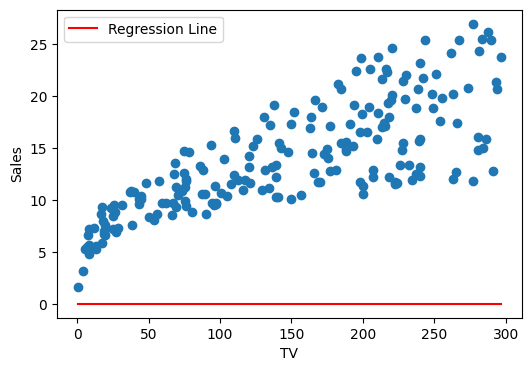

In [4]:
# Initial Line (Before Fitting)

beta_0 = 0 # y-intercept
beta_1 = 0 # slope

x = np.linspace(min(subset['TV']), max(subset['TV']), 100)
y_hat = beta_0 + beta_1 * x

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y_hat, label='Regression Line', color='red')  # Plot the line
ax.scatter(subset['TV'], subset['sales'], marker='o')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.legend()

Beta 1: 0.047536640433019736, Beta 0: 7.0325935491276965


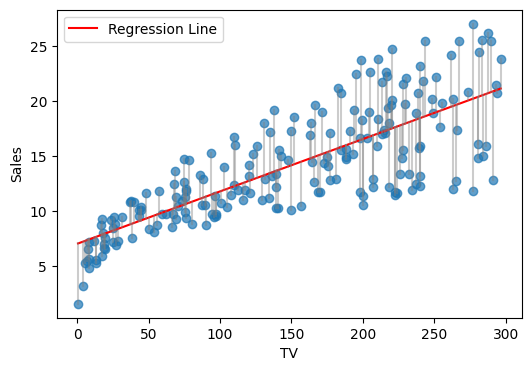

In [5]:
# After fitting

x_data = subset['TV']
y_data = subset['sales']

x_mean = x_data.mean()
y_mean = y_data.mean()

# Least squares coefficients
beta_1 = sum((x_data - x_mean) * (y_data - y_mean)) / sum((x_data - x_mean) ** 2)
beta_0 = y_mean - beta_1 * x_mean

print(f"Beta 1: {beta_1}, Beta 0: {beta_0}")

# Regression line for plotting
x_line = np.linspace(min(x_data), max(x_data), 2)
y_line = beta_0 + beta_1 * x_line

# Predicted values
y_hat_points = beta_0 + beta_1 * x_data

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_line, y_line, label='Regression Line', color='red')  # Plot the line
ax.scatter(subset['TV'], subset['sales'], marker='o', alpha=0.7) # Scatter plot the data points
for xi, yi, yhi in zip(x_data, y_data, y_hat_points): # Adding residual lines
    ax.plot([xi, xi], [yi, yhi], color='gray', alpha=0.4)
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.legend()

### __Assessing the Accuracy of the Coefficient Estimates__

The standard error of an estimator reflects how it varies under repeated sampling. The goal of this is that, if you perform data collection many number of times, how would the coefficients/parameters vary?

Standard Error Formula: $$Var(\overline{\mu})=SE(\overline{\mu})=\frac{\sigma^2}{n}$$
Standard Errors associated with the parameters: $$SE(\hat{\beta}_0)^2= \sigma^2 \left[ \frac{1}{n} + \frac{\overline{x}^2}{\sum^n_{i=1}(x_i-\overline{x})^2} \right], \hspace{0.5cm} SE(\hat{\beta}_1)^2=\frac{\sigma^2}{\sum^n_{i=1}(x_i-\overline{x})^2}$$
Computing the $\sigma^2$ from the data, this estimate is known as the *residual standard error*: $$RSE=\sqrt{\frac{RSS}{n-2}}$$

When $\sigma^2$ is estimated from the data, we should write $\hat{SE}(\hat{\beta}_1)$.

Standard Error (SE) is importance because it helps us __Quantify Uncertainty__, __Construct Confidence Intervals__, and __Perform Hypothesis Tests__.

__Confidence Interval__

Standard errors can be used to compute *confidence intervals*. A 95% confidence interval is the range of values such that with $95%$ probability, the range will contain the true unknown value of the parameter. (Note: $95%$ is the standard CI since it gives a good balance between precision and reliability.).

For Linear regression, the $95$ confidence interval for $\hat{\beta}_1$ takes the form: $$\hat{\beta}_1\pm2 \cdot SE(\hat{\beta}_1) \hspace{0.2cm} or \hspace{0.2cm} [\hat{\beta}_1+2 \cdot SE(\hat{\beta}_1),\hat{\beta}_1-2 \cdot SE(\hat{\beta}_1)]$$

This formula tells us that, we ought to be 95% confident that the true coefficient lies in this interval, considering the uncertainty of the sampling.

Confidence intervals are about the parameters. 

Thus, for the advertising dataset:

In [6]:
n = len(x_data)

from scipy.stats import t
t_crit = t.ppf(0.975, df=n-2)

# Computing the estimated error variance
rss = np.sum((y_data - beta_0 - beta_1 * x_data)**2)
sigma2_hat = rss / (n - 2)   # estimated error variance

# Computing the confidence intervals
se_beta_0 = np.sqrt(sigma2_hat * (1/n + (x_mean**2 / np.sum((x_data - x_mean)**2))))
se_beta_1 = np.sqrt(sigma2_hat / np.sum((x_data - x_mean)**2))

intercept_min, intercept_max = (beta_0 - t_crit * se_beta_0), (beta_0 + t_crit * se_beta_0)
print(f"95% Confidence interval of B0: [{intercept_min},{intercept_max}]")

slope_min, slope_max = (beta_1 - t_crit * se_beta_1), (beta_1 + t_crit * se_beta_1)
print(f"95% Confidence interval of B1: [{slope_min},{slope_max}]")

95% Confidence interval of B0: [6.129719268805537,7.935467829449856]
95% Confidence interval of B1: [0.042230716032698803,0.05284256483334067]


Interpretation: 

- __Intercept($\beta_0$).__ In the absence of TV advertising, we are $95$% confident that the mean/expected sales are around 6k-7.9k.
- __Slope($\beta_1$).__ For every additional $1,000 spent on TV advertising, we are 95% confident that mean sales increase by between 42 and 53 units, on average.

__Hypothesis Tests__

Standard errors can also be used to perform *hypothesis tests* on the coefficients. The most common hypothesis is the __null hypothesis__: 
- $H_0$: There is no relationship between $X$ and $Y$
- $H_a$: There is some relationship between $X$ and $Y$

Mathematically,

- $H_0: \beta_1 = 0$, versus 
- $H_a: \beta_1 \neq 0$

if $\beta_1=0$, then the model can be reduced to $Y=\beta_0 + \epsilon$, and $X$ is not associated with $Y$.

To test the null hypothesis, we compute the __t-statistic__: $$t=\frac{\hat{\beta}_1-0}{SE(\hat{\beta}_1)}$$

t-statistic is used to compute the p-value: 
- Big |t| → small p-value → reject $H_0$
- Small |t| → large p-value → fail to reject $H_0$

Essentially, the t-statistic quantifies “how extreme” your coefficient is under the null hypothesis.

Hypothesis test is about the relationship.

Thus, for the advertising data:

In [7]:
t_beta_0, t_beta_1 = ((beta_0 - 0) / se_beta_0), ((beta_1 - 0) / se_beta_1)

from scipy.stats import t
df = n - 2

# Two-sided p-value
p_beta_0 = 2 * (1 - t.cdf(abs(t_beta_0), df))
p_beta_1 = 2 * (1 - t.cdf(abs(t_beta_1), df))

stats_tv = {
    'coefficient': [beta_0, beta_1],
    'std_error': [se_beta_0, se_beta_1],
    't_stats': [t_beta_0, t_beta_1],
    'p_value': [p_beta_0, p_beta_1],
}
stats_tv_df = pd.DataFrame(stats_tv)
stats_tv_df

,coefficient,std_error,t_stats,p_value
0,7.032594,0.457843,15.360275,0.0
1,0.047537,0.002691,17.667626,0.0


Both coefficients have p-values ≈ 0, which means there is extremely strong evidence that baseline sales and TV advertising both have a real, nonzero effect on sales.

Based from the results, we reject the null hypothesis--that is, we declare a relationship between $X$ and $Y$--if the p-value is small enough. Typical p-value cutoffs for rejecting the null hypothesis are 5% (p-value = <0.05) or 1% (p-value = <0.01).

__When the Standard Error is much larger than the Coefficient, the result cannot be considered reliable.__

__Overall__.
| Purpose             | How SE is used                     | What it tells you                                |
| ------------------- | ---------------------------------- | ------------------------------------------------ |
| Confidence interval | Multiplied by t critical value     | Range where true coefficient likely lies         |
| Hypothesis test     | Divides coefficient to form t-stat | Whether effect is significantly different from 0 |

CI → quantifies uncertainty in parameter estimates
Hypothesis test → tests if predictor has a real effect

__Overall__.

### __Assessing the Accuracy of the Model__

After rejecting the null hypothesis, we now move on to quantify the accuracy of our model.

This is assessed using two related quantities:
- The *residual standard error* (RSE): $$RSE=\sqrt{\frac{1}{n-2}RSS}=\sqrt{\frac{1}{n-2}\sum^n_{i=1}(y_i-\hat{y}_i)^2}$$
The RSE is considered a measure of *lack of fit* of the model to the data. If the predictions obtained using the model are very close tot the true outcome values, then the RSE will be small, and we can conclude that the model fits the data very well. Otherwise, the model doesn't fit the data well.

- The $R^2$ statistic: $$R^2=\frac{TSS-RSS}{TSS}=1-\frac{RSS}{TSS}$$ where $TSS=\sum(y_i-\hat{y}_i)^2$.
The $R^2$ provides an alternative measure of fit. It measures the proportion variability of $Y$ that can be explained using $X$. The values are within the range $[0,1]$. An $R^2$ that is close to 1 indicates that a large proportion of the variability in the response is explained by the regression. A number near 0 indicates that the regression does not explain much of the variability in the response. This might occur because the linear model is wrong, or the error variance $\sigma^2$ is high, or both. It can be shown that this simple linear regression setting that $R^2=r^2$, where $r$ is the correlation between $X$ and $Y$: $$r=Cor(X,Y)=\frac{\sum^n_{i=1}(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum^n_{i=1}(x_i-\overline{x})^2}\sqrt{\sum^n_{i=1}(y_i-\overline{y})^2}}$$

From the advertising dataset:

In [8]:
rss = sum((y_data - beta_0 - beta_1 * x_data)**2)
tss = sum((y_data - y_mean)**2)

rse = np.sqrt((1 / (n-2)) * rss)
r_2 = 1 - (rss / tss)

stats_acc = {
    'Quantity': ['Residual STD', 'R^2', 'F-statistic'],
    'Value': [rse, r_2, None]
}
stats_acc_df = pd.DataFrame(stats_acc).set_index('Quantity')
stats_acc_df

,Value
Quantity,
Residual STD,3.258656
R^2,0.611875
F-statistic,NaN


## __II. Multiple Linear Regression__

Equation: $$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$$
For the advertising data: $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$

### __Estimating the Regression Coefficients__

We can make predictions using the formula: $$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + ... + \hat{\beta}_px_p$$
The parameters are estimated using the same least squares approach from simple linear regression: 
$$ 
\begin{aligned}
RSS &= \sum^n_{i=1} (y_i-\hat{y_i})^2 \\
    &= \sum^n_{i=1} (y_i - \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + ... + \hat{\beta}_px_p)^2
\end{aligned}
$$

Earlier, we derived them using calculus. But, now since there are multiple parameters, matrix algebra is commonly used. 

insert parameter values...

Interpreting regression coefficients:
- The ideal scenario is when the predictors are __uncorrelated__ (compute using Correlation Matrix/R^2)
- Correlations amongst predictors cause problems:
    - The variance of all coefficients tends to increase and
    - Interpretations become hazardous such as any changes in $X_j$, everything else changes.
- __Claims of Causality__ i.e. stating that 'A causes B' should be avoided for observational data.

In [98]:
data_df = pd.read_csv('Advertising.csv')

predictors = ['TV', 'radio', 'newspaper']
response = ['sales']

X_pd = data_df[predictors]
X_np = X_pd.to_numpy()
X = np.insert(X_np, 0, 1, axis=1)

y_df = data_df[response]
y = y_df.to_numpy()

beta = np.linspace(0, 0, len(predictors) + 1).reshape(4,1)

print(f'X Shape: {X.shape}')
print(f'y Shape: {y.shape}')
print(f'Beta: {beta.shape}')

# Estimating the coefficients
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
beta = beta.flatten()

# Computing the Standard Error
p = len(predictors)
n = X.shape[0]
sigma_sq = (rss / (n-p-1)).item() # Computing the residual variance (sigma squared)
var_beta = sigma_sq * np.linalg.inv(X.T @ X)
se_beta = np.sqrt(np.diag(var_beta))

# Computing the t-statistic
t_stats = np.linspace(0, 0, len(predictors) + 1)
for i in range(len(t_stats)):
    t_i = (beta[i] - 0) / se_beta[i]
    t_stats[i] = t_i

# p-values
p_beta = np.linspace(0, 0, len(predictors) + 1)
dof = n - p - 1
for i in range(len(p_beta)):
    p_beta_i = 2 * (1 - t.cdf(abs(t_stats[i]), dof))
    p_beta[i] = p_beta_i

advertising_stats = {
    '': np.insert(predictors, 0, 'intercept', axis=0),
    'Coefficient': beta,
    'std_error': se_beta,
    't_stats': t_stats,
    'p-value': p_beta,
}
advertising_df = pd.DataFrame(advertising_stats)
advertising_df

X Shape: (200, 4)
y Shape: (200, 1)
Beta: (4, 1)


,,Coefficient,std_error,t_stats,p-value
0,intercept,2.938889,0.311908,9.422288,0.000000
1,TV,0.045765,0.001395,32.808624,0.000000
2,radio,0.188530,0.008611,21.893496,0.000000
3,newspaper,-0.001037,0.005871,-0.176715,0.859915


<Axes: >

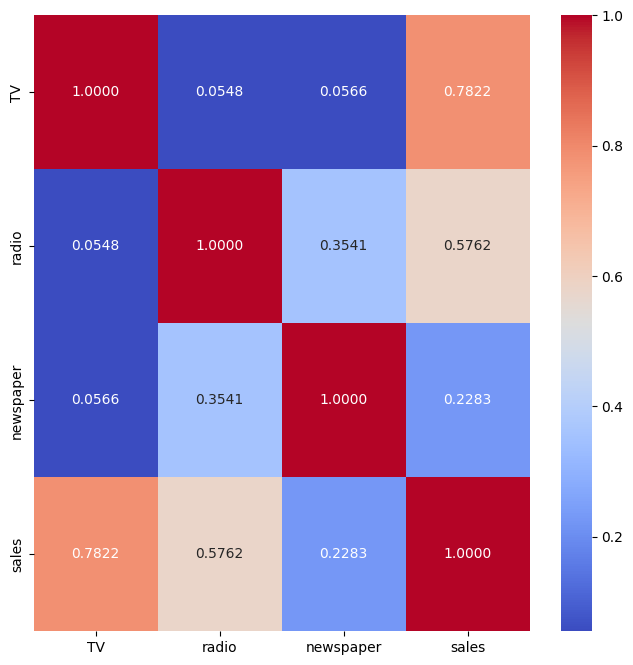

In [87]:
# Covariance Matrix
import seaborn as sns
predictor_df = data_df[predictors + response]
corr = predictor_df.corr()

fig, ax =  plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.4f')

### __Some important questions to ponder__

__1. Is at least one of the predictors $X_1, X_2,...,X_p$ useful in predicting the response?__

To answer this question, recall in simple linear regression, we simply perform the *Hypothesis Test*. We test the null hypothesis:
$$
H_0: \beta_1 = \beta_2 = ... \beta_p = 0
$$
versus the alternative
$$
H_a: \text{at least one $B_j$ is non-zero.}
$$
This test is performed by computing the $F$-statistic: 
$$
F = \frac{(TSS - RSS)/p}{RSS/(n-p-1)}
$$
and that, provided $H_0$ is true,
$$
E \{(TSS-RSS)/p\} = \sigma^2
$$
When there is no relationship between the response and predictiors, one would expect the F-statistic to take on a value close to 1. Otherwise, $E \{(TSS-RSS)/p\} > \sigma^2$, so we expect F to be greater than 1.

__2. Do all the predictors help to explain $Y$, or is only a subset of the predictors useful? (Deciding on Important Variables)__

__Variable Selection__. The task of determining which predictors are associated with the response.
Now, How do we decide? The most direct approach is the __all subsets__ or __best subsets__ regression i.e. trying out different regression models with only the subset of predictors. However, this is not practical.

There are three (3) classical approaches for this task:
- __Forward Selection__.
    - Begin with the null model--intercept only, no predictors--.
    - Then, fit p simple linear regressions and add to the null model the variable that results in the lowest RSS.
    - Then, add to that model the variable that results in the lowest RSS for the new two-variable model.
    - Continue until some stopping rule is satisfied e.g. all remaining variables have a p-value above some threshold.
- __Backward Selection__.
    - Start with all the variables in the model.
    - Remove the variable with the largest p-value.
    - The new (p − 1)-variable model is fit, and the variable with the largest p-value is removed.
    - Continue until a stopping rule is satisfied e.g. all remaining variables have a p-value below some threshold.
- __Mixed Selection__.
    - Combination of forward and backward.
    - Start with no variables
    - Add the variable that provides the best fit
    - Continue to add variables one-by-one
    - If at any point the p-value for one of the variables in the model rises above a certain threshold, then we remove that varaible from the model.
    - Continue to perform this forward and backward selection.

Some methods to find the optimal members in the model are: __*Mallow's $C_p$*, *Akaike information Criteria (AIC)*, *Bayesian Information Criteria (BIC)*, and *adjusted $R^2$*__

Notes:
- Backward selection cannot be used if $p > n$, while forward selection can always be used.

__3. How well does the model fit the data?__

Two of the most common numerical measures of model fit are the RSE and $R^2$. These quantities are computed and interpreted in the same fashion as for simple linear regression.
- $R^2$ that is close to 1 indicates that the model explain a large portion of the variance in the response variable.
- The best model has __less RSE__. RSE for multiple variables:
  $$
  RSE = \sqrt{\frac{1}{n-p-1}RSS}
  $$

In addition to the two, it can also be useful to plot the data. Graphical summaries can reveal problems with a model that are not visible from numerical statistics. 

__4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction? (Prediction)__

There are three sorts of uncertainty associated with this prediction:

1. __Uncertainty in Coefficient Estimates (Reducible Error)__. The least squares plane $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + ... + \hat{\beta}_p X_p$ is only an estimate of the true regresison plane $Y = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p$. Because the coefficients are calculated from a sample, they are subject to inaccuracy. We use confidence intervals to determine how close our estimate $\hat{Y}$ is to the true $f(X)$.
2. __Model Bias (Reducible Error)__. In reality, the relationship between predictors and the response is rarely perfectly linear. Assuming a linear model is almost always an approximation. This discrepancy between the true functional form and the linear model is known as model bias. While the text acknowledges this error, it notes that for certain analyses, we operate as if the linear model is correct.
3. __Random Error (Irreducible Error)__. Even if we knew the true population regression plane $f(X)$ perfectly, we still could not predict the response $Y$ with 100% accuracy. This is due to the random error term $(ϵ)$ inherent in the model. This variation is "irreducible" because it cannot be removed, no matter how good our model is.

__Difference between Confidence Interval and Prediction Interval__
| Feature | Confidence Interval | Prediction Interval |
| ---- | ---- | ---- |
| Focus | Quantifies uncertainty around the average response (e.g., average sales over many cities). | Quantifies uncertainty around a particular response (e.g., sales for one specific city). |
| Components | Accounts only for reducible error (estimation of f(X)). | Accounts for both reducible error and irreducible error (ϵ) | 
| Width | Narrower. | Substantially wider because it must account for individual variation |

### __Other Considerations in the Regression Model__

__Qualitative Predictors__

Some predictors are not quantitative but are quantitative, taking a discrete set of values. (also called categorical predictors or factor variables)

__*Qualitative Predictors with Two Levels*__

Example (Credit Card Data):
$$
x_i = \begin{cases}
1 & \text{if } i\text{th person owns a house} \\
0 & \text{if } i\text{th person does not own a house}
\end{cases}
$$

This results in the model:
$$
y_i = \beta_0 + \beta_1x_i + \epsilon_i = 
\begin{cases}
\beta_0 + \beta_1x_i + \epsilon_i & \text{if } i\text{th person owns a house} \\
\beta_0 + \epsilon_i & \text{if } i\text{th person does not own a house}
\end{cases}
$$

Alternatively, if we change our encoding scheme:
$$
x_i = \begin{cases}
1 & \text{if } i\text{th person owns a house} \\
-1 & \text{if } i\text{th person does not own a house}
\end{cases}
$$

$$
y_i = \beta_0 + \beta_1x_i + \epsilon_i = 
\begin{cases}
\beta_0 + \beta_1 + \epsilon_i & \text{if } i\text{th person owns a house} \\
\beta_0 - \beta_1 + \epsilon_i & \text{if } i\text{th person does not own a house}
\end{cases}
$$


__*Qualitative predictors with More than Two Levels*__

The first level:
$$
x_i = \begin{cases}
1 & \text{if } i\text{th person is from the South} \\
0 & \text{if } i\text{th person is not from the South}
\end{cases}
$$

And the second level:
$$
x_i = \begin{cases}
1 & \text{if } i\text{th person is from the West} \\
0 & \text{if } i\text{th person is not from the West}
\end{cases}
$$

This results in the model
$$
y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \epsilon_i = 
\begin{cases}
\beta_0 + \beta_1 + \epsilon_i & \text{if } i\text{th person is from the South} \\
\beta_0 + \beta_2 + \epsilon_i & \text{if } i\text{th person is from the West} \\
\beta_0 + \epsilon_i & \text{if } i\text{th person is from the East} \\
\end{cases}
$$

Note: In regression with qualitative predictors, one category is always dropped to serve as the baseline (or reference group). For this, *East* is used as the baseline.

### __Extensions of the Model__

- Assumptions in the relationships between predictors and responses:
    - **Additive** Predictor $X_j$ and the response $Y$ does not depend on the values of other predictors. 
    - **Linear** The change in the response $Y$ is associated with one unit change in $X_j$

***Removing the Additive Assumption***
- **Interaction (Synergy in marketing) Effect.** occurs when the impact of one independent variable on a dependent variable depends on the level of another independent variable.
- **Interaction Term** is used to relax the additive assumption. For example. In the adversting dataset we can add a third predictor:

$$
\begin{align}
Y &= \beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_1X_2+\epsilon \\
Y &= \beta_0+(\beta_1+\beta_3X_2)X_1+\beta_2X_2+\epsilon \\
Y &= \beta_0+\tilde{\beta_1}X_1+\beta_2X_2+\epsilon
\end{align}
$$

- with this, the association between $X_1$ and $Y$ is no longer constant: a change in the value of $X_2$ will change the association between $X_1$ and $Y$.
- **Hierarchical Principle** it states that if we include an interaction in a model, we also include the main effects, even if the p-values associated with their coefficients are not significant.
- **Interactions between quantitative and qualitative data:** Consider the Credit data set, and suppose that we wish to predict balance using income (quantitative) and student (qualitative). Without an interaction term, the model takes the form:
$$
\begin{align}
balance_i &\approx \beta_0 + \beta_1 \times income_i + 
\begin{cases} 
\beta_2 & \text{if ith person is a student} \\ 
0 & \text{if ith person is not a student}
\end{cases} \\
&= \beta_1 \times income_i + 
\begin{cases} 
\beta_0 + \beta_2 & \text{if ith person is a student} \\ 
\beta_0 & \text{if ith person is not a student}
\end{cases} \\
\end{align}
$$
With interactions, it takes the form:
$$
\begin{align}
balance_i &\approx \beta_0 + \beta_1 \times income_i + 
\begin{cases} 
\beta_2 + \beta_3 \times income_i & \text{if student} \\ 
0 & \text{if not a student}
\end{cases} \\
&=
\begin{cases} 
(\beta_0 + \beta_2) + (\beta_1 + \beta_3) \times income_i & \text{if student} \\ 
\beta_0 + \beta_1 \times income_i & \text{if not a student}
\end{cases} \\
\end{align}
$$

***Non-linear Relationships***
- In some cases, the relationship between the predictors and responses are non-linear. To solve this, we use **Polynomial Regression**.
- Example: $mpg = \beta_0 + \beta_1 \times horsepower + \beta_2 \times horsepower^2 + \epsilon$

### __Potential Problems__

Most common problems:
- Non-linearity of the response-predictor relationships
- Correlation of error terms
- Outliers
- Non-constant variance of error terms
- High-leverage points
- Collinearity

**1. Non-linearity of the Data**
- The linear regression model assumes that there is a straight-line relationship between the predictors and responses.
- If the true relationship is far from linear, then the results from the fit are highly suspicious.
- **Residual Plots** are a useful graphical tool for identifying non-linearity.
- Idelly, the residual plot will show no discernible pattern. The presence of a pattern may indicate a problem with some aspect of the linear model.

**2. Correlation of Error Terms**
- If there is correlation among the error terms, then the estimated standard errors will ten to underestimate the true standard errors. As a result, confidence and prediction intervals will be narrower than they should be.
- p-values associated with the model will be lower than they should be.
- Such correlations frequently occur in **time series data**.
- If the error terms are positively correlated, we may see **tracking** in the residuals--that is, adjacent residuals may have similar values.

**3. Non-constant Variance of Error Terms**
- Another assumption of the linear regression model is that the error terms have a constant variance, $Var(\epsilon_i)=\sigma^2$
- **Heteroscedasticity** the condition in statistics and econometrics where the variance of residuals (error terms) is not constant across all levels of an independent variable in a regression model.
- One possible solution is to transform the response $Y$ using a concave function such as $\log{Y}$ or $\sqrt{Y}$
- Sometimes we have a good idea of the variance of each response. For example, the ith response could be an average of $n_i$ raw observations. If each of these raw observations is uncorrelated with variance $\sigma^2$, then their average has variance $\sigma^2_i=\frac{\sigma^2}{n_i}$. In this case a simple remedy is to fit out model by **weighted least squares**, with weights proportional to the inverse variances i.e. $w_i = n_i$.

**4. Outliers**
- One of the reason is from incorrect recording of an observation during data collection.
- One solution is to simply remove the observation. However, since an outlier may indicate a deficiency with the model, such as missing predictor.

**5. High Leverage Points**
- **High leverage points** data points in regression analysis with extreme, unusual independent variable (\(x\)) values, located far from the mean of other observations.
- They tend to have a sizable impact on the estimated regression line.
- In order to quantify an observation's leverage, we compute the **leverage statistic**. For a simple linear regression:
$$
h_i = \frac{1}{n} + \frac{(x_i - \overline{x})^2}{\sum_{i'=1}^2(x_i - \overline{x})^2}
$$
- The leverage statistic $h_i$ is always between $\frac{1}{n}$ and $1$ and the average leverage for all the observation has a leverage statistic always equal to $\frac{p+1}{n}$

**6. Collinearity**
- **Collinearity** when two or more predictor variables are closely related to one another.
- It causes great deal of uncertainty in the coefficient estimates.
- It reduces the accuarcy of the estimtes of the regression coefficients.
- A simply way to detect collinearity is to look at the **correlation matrix** of the predictors.
- **Multicollinearity** collinearity exist between three or more predictors.
- A way to solve this is to compute the **variance inflration factor (VIF)**:
$$
VIF(\hat{\beta}_j) = \frac{1}{1-R^2_{X_j|X_{-j}}}
$$
- VIF = 1: No correlation
- 1 < VIF < 5: Moderate correlation; generally not problematic.
- VIF > 5: High correlation; some sources consider this a sign of concerning multicollinearity.
- VIF > 10: Severe multicollinearity; commonly considered the threshold for, requiring removal or correction. 

### __Comparison of Linear Regression with K-Nearest Neighbors__

- **K-nearest neighbor regression (KNN Regression)** is one of the simplest and best-known non-parametric methods.
- Given a value for $K$ and a prediction point $x_0$, KNN regression first identifies the $K$ training observations that are closest to $x_0$ represented by $\mathcal{N}_0$. It then estimates $f(x_0)$ using the average of all the trianing responses in $\mathcal{N}_0$:
$$
\hat{f}(x_0) = \frac{1}{K}\sum_{x_i \in \mathcal{N}_0} y_i
$$
- in higher dimensions, KNN often performs worse than linear regression.
- **Curse of Dimensionality** various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often hundreds or more features) that do not occur in low-dimensional settings.
- As a general rule, parametric methods will tend to outperform non-parametric approaches when there is a small number of observations per predictor.